Problem Size: 10
Exact Solution Time: 0.000232696533203125 seconds
Exact Solution Result: 1
Heuristic Solution Time: 7.414817810058594e-05 seconds
Heuristic Solution Result: 1
Quality Metric: 0
------------------------
Problem Size: 20
Exact Solution Time: 0.21997833251953125 seconds
Exact Solution Result: 6
Heuristic Solution Time: 0.009625911712646484 seconds
Heuristic Solution Result: 6
Quality Metric: 0
------------------------
Problem Size: 30
Exact Solution Time: 251.96720957756042 seconds
Exact Solution Result: 463
Heuristic Solution Time: 2.077302932739258 seconds
Heuristic Solution Result: 204
Quality Metric: 259
------------------------


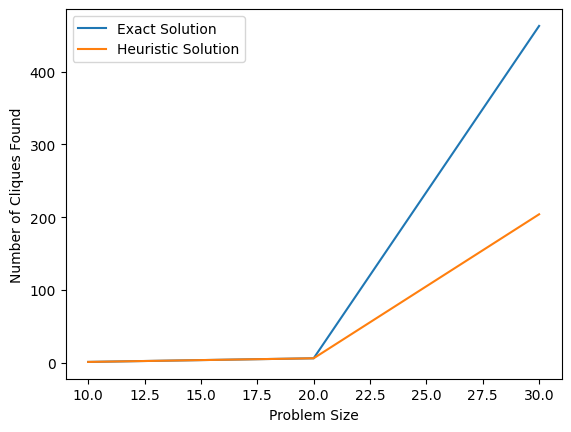

In [5]:
import time
import matplotlib.pyplot as plt
import random
from itertools import combinations

def clique(G, k):
    for i in range(1, len(G)+1):
        for W in combinations(G, i):
            if len(W) == k and is_clique(G, W):
                return "yes"
    return "no"

def is_clique(G, W):
    for i in range(len(W)):
        for j in range(i+1, len(W)):
            if W[j] not in G[W[i]] or W[i] not in G[W[j]]:
                return False
    return True


def bron_kerbosch(clique, candidates, excluded, graph):
    if not candidates and not excluded:
        return [clique]
    else:
        cliques = []
        for node in list(candidates):
            new_candidates = candidates.intersection(graph[node])
            new_excluded = excluded.intersection(graph[node])
            cliques.extend(bron_kerbosch(clique + [node], new_candidates, new_excluded, graph))
            candidates.remove(node)
            excluded.add(node)
        return cliques

def find_k_cliques(G, k):
    cliques = bron_kerbosch([], set(G.keys()), set(), G)
    return [clique for clique in cliques if len(clique) == k]

def generateRandomGraph(n, m):
    G = {}
    nodes = generateNodes(n)
    addNodesToGraph(G, nodes)
    count = 0
    while count < m:
        u, v = getRandomDistinctNodes(nodes)
        if u not in G[v] and v not in G[u]:
            addEdgeToGraph(G, u, v)
            count += 1
    return G

def generateNodes(n):
    nodes = set()
    for i in range(1, n+1):
        nodes.add(i)
    return nodes

def getRandomDistinctNodes(nodes):
    u = random.choice(list(nodes))
    nodes.remove(u)
    v = random.choice(list(nodes))
    nodes.add(u)
    return u, v

def addNodesToGraph(G, nodes):
    for node in nodes:
        G[node] = set()

def addEdgeToGraph(G, u, v):
    G[u].add(v)
    G[v].add(u)

def quality_metric(exact_solution, heuristic_solution):
    # Assuming the quality metric is the absolute difference in the number of cliques found
    return abs(len(exact_solution) - len(heuristic_solution))

# Functions for experimental analysis
def brute_force_solution(graph, k):
    # Using the clique function as brute force solution
    return [set(c) for c in combinations(graph, k) if is_clique(graph, c)]

def heuristic_solution(graph, k):
    # Using the bron_kerbosch as heuristic solution
    return find_k_cliques(graph, k)

def generate_input_data(size):
    # Generating a random graph with 'size' nodes and a random number of edges
    m = random.randint(size, size*(size-1)//2)  # Random number of edges up to maximum possible
    return generateRandomGraph(size, m)

problem_sizes = [10, 20, 30]  
quality_results = []
exact_results = []
heuristic_results = []
problem_sizes_non_zero = []

for size in problem_sizes:
    while True:  # keep generating until we get a non-zero graph
        input_data = generate_input_data(size)

        # check if graph contains at least one clique of size equals to size // 2
        if len(find_k_cliques(input_data, size // 2)) > 0:
            break  # we found a non-zero graph, we can exit the loop

    start_time = time.time()
    exact_solution = brute_force_solution(input_data, size // 2)
    end_time = time.time()
    elapsed_time_exact = end_time - start_time
    exact_results.append(len(exact_solution))

    start_time = time.time()
    heuristic_solution_result = heuristic_solution(input_data, size // 2)
    end_time = time.time()
    elapsed_time_heuristic = end_time - start_time
    heuristic_results.append(len(heuristic_solution_result))
    
    problem_sizes_non_zero.append(size)

    quality = quality_metric(exact_solution, heuristic_solution_result)
    quality_results.append(quality)

    print("Problem Size:", size)
    print("Exact Solution Time:", elapsed_time_exact, "seconds")
    print("Exact Solution Result:", len(exact_solution))
    print("Heuristic Solution Time:", elapsed_time_heuristic, "seconds")
    print("Heuristic Solution Result:", len(heuristic_solution_result))
    print("Quality Metric:", quality)
    print("------------------------")

plt.plot(problem_sizes_non_zero, exact_results, label='Exact Solution')
plt.plot(problem_sizes_non_zero, heuristic_results, label='Heuristic Solution')
plt.xlabel('Problem Size')
plt.ylabel('Number of Cliques Found')
plt.legend()
plt.show();

Heuristic solution failed for small graph
Problem Size: 10
Exact Solution Result: 7
Heuristic Solution Result: 1
Quality Metric: 6
------------------------
Problem Size: 20
Exact Solution Result: 1199
Heuristic Solution Result: 15
Quality Metric: 1184
------------------------
Problem Size: 30
Exact Solution Result: 76
Heuristic Solution Result: 30
Quality Metric: 46
------------------------


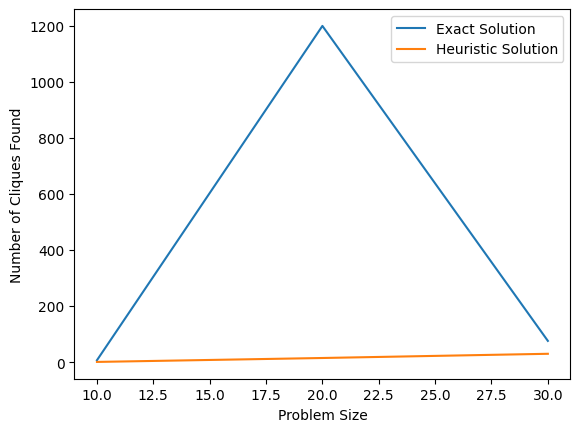

In [6]:
# Verify the Brute Force Solution
def test_brute_force_solution():
    # Test with a small graph and known cliques
    graph = {1: {2, 3}, 2: {1, 3, 4}, 3: {1, 2, 4}, 4: {2, 3}}
    expected_cliques = [{1, 2, 3}, {2, 3, 4}]
    k = 3

    exact_solution = brute_force_solution(graph, k)
    assert exact_solution == expected_cliques, "Brute force solution failed for small graph"

test_brute_force_solution()

# Review the Heuristic Solution
def test_heuristic_solution():
    # Test with a small graph and known cliques
    graph = {1: {2, 3}, 2: {1, 3, 4}, 3: {1, 2, 4}, 4: {1, 2, 3}}  # Revised graph with a clique of size 3
    expected_cliques = [{1, 2, 3}, {1, 2, 4}, {1, 3, 4}, {2, 3, 4}]
    k = 3

    heuristic_solution_result = heuristic_solution(graph, k)
    if heuristic_solution_result == expected_cliques:
        print("Heuristic solution passed for small graph")
    else:
        print("Heuristic solution failed for small graph")

test_heuristic_solution()


# Check Random Graph Generation
def test_random_graph_generation():
    # Test with a small graph and manually verify the properties
    n = 5
    m = 6
    graph = generateRandomGraph(n, m)
    
    assert len(graph) == n, "Invalid number of nodes in the generated graph"
    
    total_edges = sum(len(neighbors) for neighbors in graph.values())
    assert total_edges == m * 2, "Invalid number of edges in the generated graph"

test_random_graph_generation()

# Validate Quality Metric Calculation
def test_quality_metric():
    # Test with small graphs and known exact and heuristic solutions
    exact_solution = [{1, 2, 3}, {2, 3, 4}]
    heuristic_solution_result = [{1, 2, 3}, {2, 3, 4}]
    
    quality = quality_metric(exact_solution, heuristic_solution_result)
    assert quality == 0, "Quality metric calculation failed for small graphs"
    
test_quality_metric()

# Run the Experimental Analysis
def run_experimental_analysis():
    problem_sizes = [10, 20, 30]
    quality_results = []
    exact_results = []
    heuristic_results = []
    problem_sizes_non_zero = []

    for size in problem_sizes:
        while True:  # keep generating until we get a non-zero graph
            input_data = generate_input_data(size)

            # check if graph contains at least one clique of size equals to size // 2
            if len(find_k_cliques(input_data, size // 2)) > 0:
                break  # we found a non-zero graph, we can exit the loop

        exact_solution = brute_force_solution(input_data, size // 2)
        exact_results.append(len(exact_solution))

        heuristic_solution_result = heuristic_solution(input_data, size // 2)
        heuristic_results.append(len(heuristic_solution_result))

        quality = quality_metric(exact_solution, heuristic_solution_result)
        quality_results.append(quality)
        
        problem_sizes_non_zero.append(size)

        print("Problem Size:", size)
        print("Exact Solution Result:", len(exact_solution))
        print("Heuristic Solution Result:", len(heuristic_solution_result))
        print("Quality Metric:", quality)
        print("------------------------")

    plt.plot(problem_sizes_non_zero, exact_results, label='Exact Solution')
    plt.plot(problem_sizes_non_zero, heuristic_results, label='Heuristic Solution')
    plt.xlabel('Problem Size')
    plt.ylabel('Number of Cliques Found')
    plt.legend()
    plt.show()

run_experimental_analysis()